In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SVMSMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Chargement des données
df=pd.read_csv('cardio_train.csv',sep=';')
del df["id"]

In [3]:
#Analyse exploratoire
def analyse_dataframe(df):
    
    print("Les dimensions du Dataframe sont : ",df.shape)    
    print('\n')
    print("Les informations sont : ")
    print(df.info())
    print("\n")
    print("Resume statistique :")
    print(df.describe())
    
    #Analyse des valeurs manquantes
    print("\n")
    print("Nombre de valeurs nulles par colonne :")
    print(df.isnull().sum())
    
    #Nombre de valeurs différentes par variable
    print("\n")
    print("Nombre de modalités par variable :")
    print(df.nunique())
    
    return 0

analyse_dataframe(df)

Les dimensions du Dataframe sont :  (70000, 12)


Les informations sont : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB
None


Resume statistique :
                age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.0

0

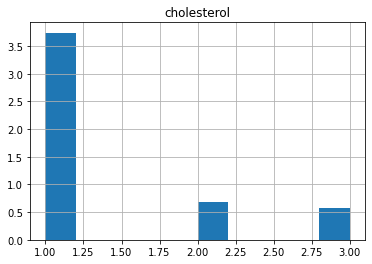

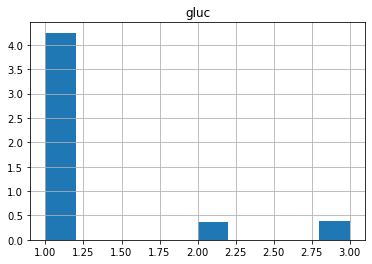

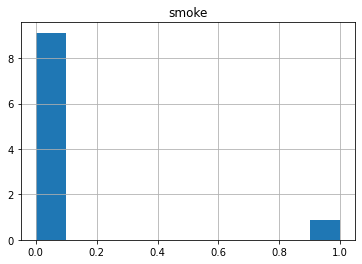

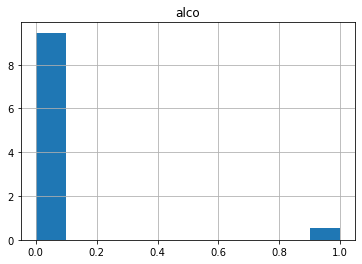

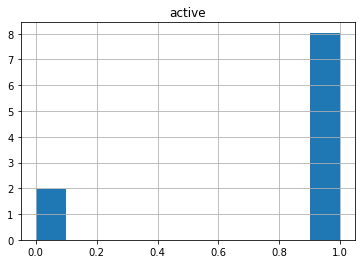

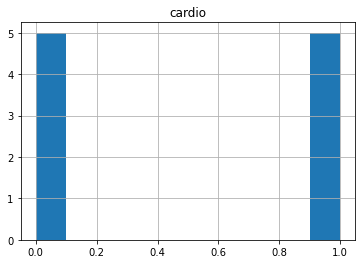

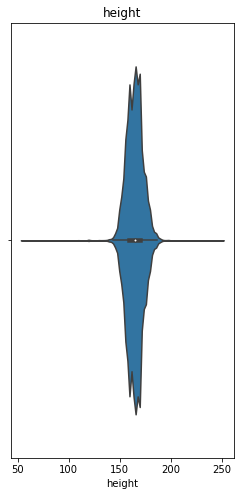

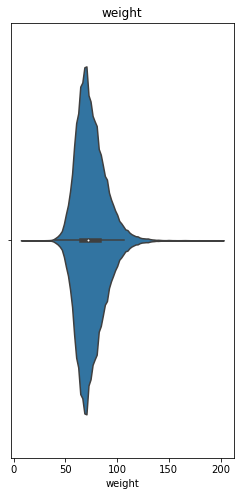

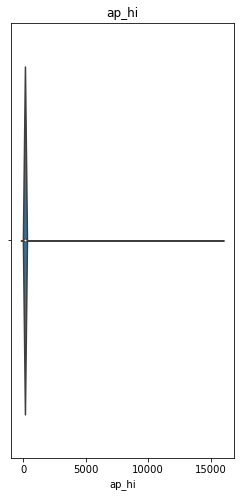

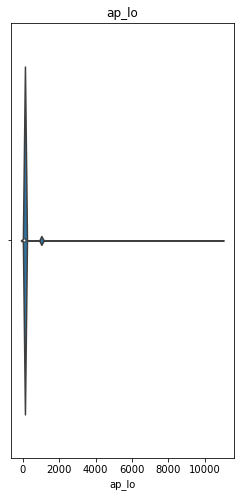

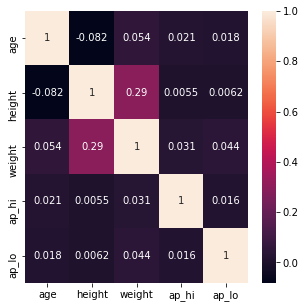

0

In [4]:
def analyse_dataframe2(df):
    Cat_feat = ['gender','cholesterol','gluc','smoke','alco','active','cardio']
    Num_feat = ['age','height','weight','ap_hi','ap_lo']
    
    
    
    df_cat = df[Cat_feat]
    df_num = df[Num_feat]
    
    #Pour les variables qualitatives
    for i in range (1,df_cat.shape[1]):
        #Variable quanlitative : histogramme
        df[df_cat.columns[i]].hist(density=True)
        plt.title(df_cat.columns[i])
        plt.show()
        plt.close()
            
    #Pour les variables quantitatives
    for i in range (1,df_num.shape[1]):
        plt.figure(figsize=(4, 8))
        sns.violinplot(df_num[df_num.columns[i]])
        plt.title(df_num.columns[i])
    
    #Analyse des correlations
    plt.figure(figsize=(5, 5))
    corrMatrix = df_num.corr()
    sns.heatmap(corrMatrix, annot=True)
    plt.show()
    plt.close()
    
    return 0

analyse_dataframe2(df)

Text(0.5, 1.0, 'active')

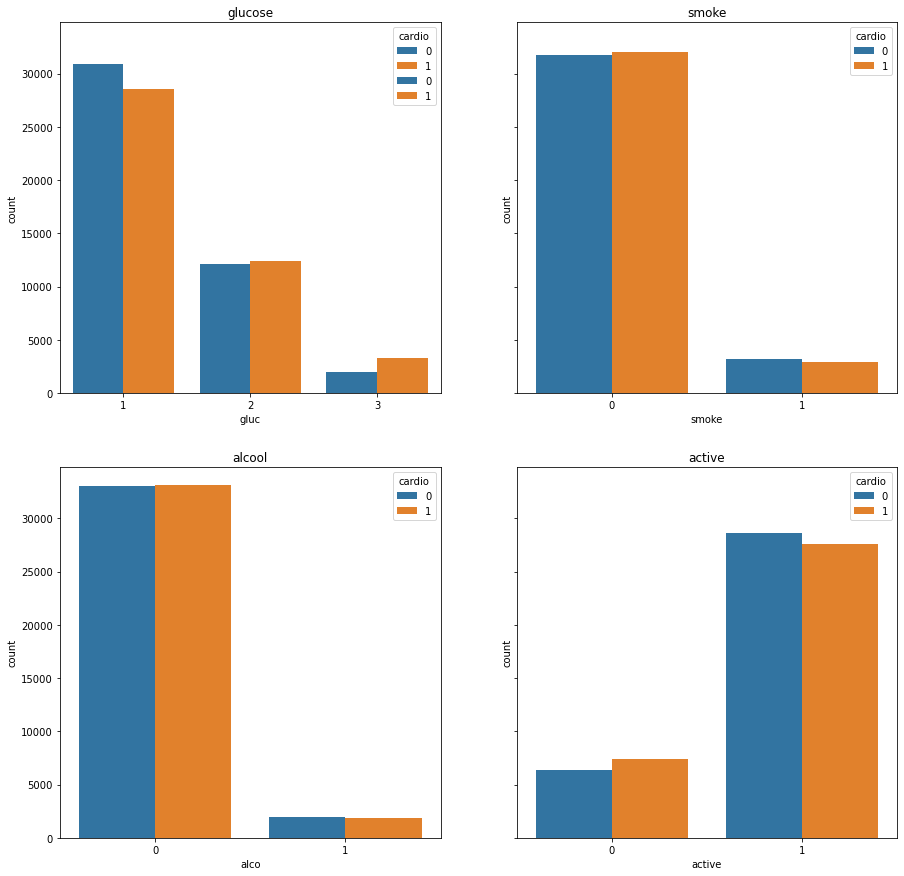

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharey=True)
sns.countplot(ax=axes[0, 0],x='gender', hue = 'cardio',data = df).set_title('Genre')
sns.countplot(ax=axes[0, 0],x='gluc', hue = 'cardio',data = df).set_title('glucose')
sns.countplot(ax=axes[0, 1],x='smoke', hue = 'cardio',data = df).set_title('smoke')
sns.countplot(ax=axes[1, 0],x='alco', hue = 'cardio',data = df).set_title('alcool')
sns.countplot(ax=axes[1, 1],x='active', hue = 'cardio',data = df).set_title('active')

Text(0.5, 1.0, 'ap_lo')

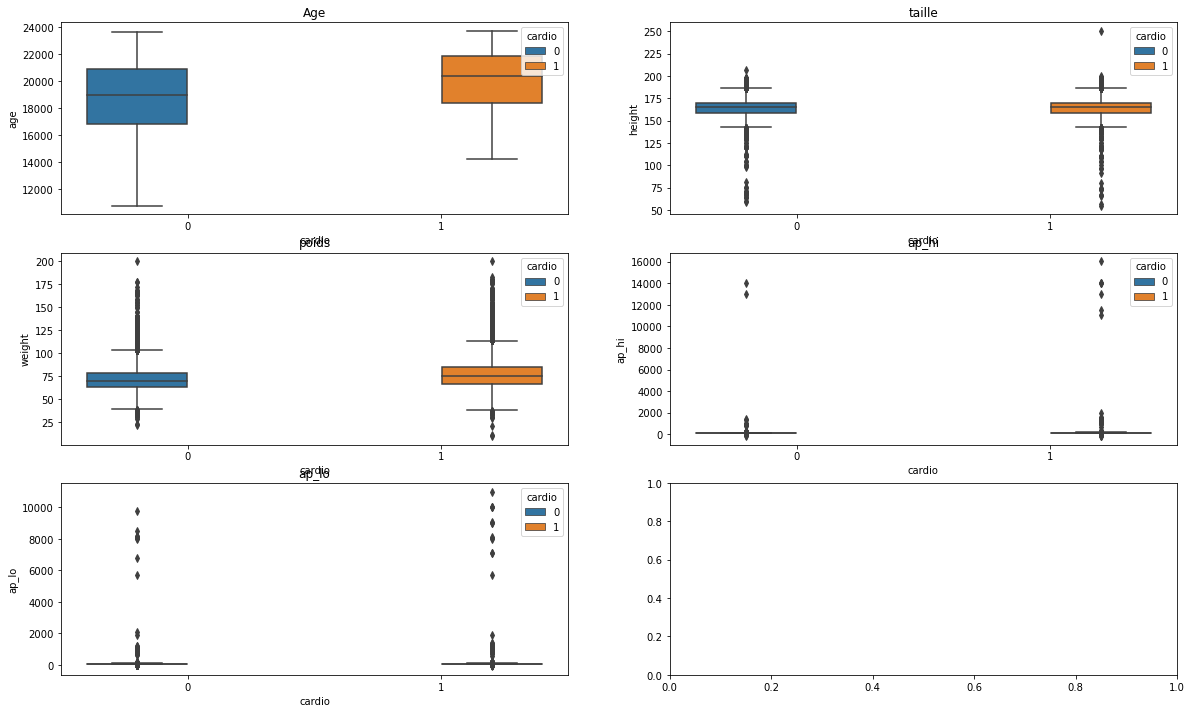

In [6]:
fig, axes = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(ax=axes[0,0], y='age',x = 'cardio', hue = 'cardio',data = df).set_title('Age')
sns.boxplot(ax=axes[0,1], y='height',x = 'cardio', hue = 'cardio',data = df).set_title('taille')
sns.boxplot(ax=axes[1,0], y='weight',x = 'cardio', hue = 'cardio',data = df).set_title('poids')
sns.boxplot(ax=axes[1,1], y='ap_hi',x = 'cardio', hue = 'cardio',data = df).set_title('ap_hi')
sns.boxplot(ax=axes[2,0], y='ap_lo',x = 'cardio', hue = 'cardio',data = df).set_title('ap_lo')

In [7]:
y = df['cardio'].values
del df['cardio']

X_train, X_test, y_train, y_test = train_test_split(df,y,test_size=0.25,random_state=42)

In [8]:
# SVM
#svm_param = {
#    "C": [1],
#    "gamma": ['auto'],
#    "kernel": ["rbf"]
#}

#svm_grid = GridSearchCV(estimator=SVC(probability = False), param_grid=svm_param, scoring = 'accuracy', cv= 1)
#svm_grid.fit(X_train, y_train)

#acc = accuracy_score(y_true=y_test, y_pred=svm_grid.predict(X_test))
#print(acc)
#print(grid_search.best_params)

In [9]:
classifier1 = SVC(C = 50, kernel = "rbf", probability = True)

#classifier1.fit(X_train, y_train)
#acc = accuracy_score(y_true=y_test, y_pred=classifier1.predict(X_test))
#print(acc)

In [10]:
classifier2 = RandomForestClassifier(n_estimators = 100, criterion = "gini", max_depth = 10,
                                     max_features = "auto", n_jobs = 4, random_state = 1000)

#classifier2.fit(X_train, y_train)
#acc = accuracy_score(y_true=y_test, y_pred=classifier2.predict(X_test))
#print(acc)

In [11]:
classifier3 = KNeighborsClassifier(n_neighbors=25,algorithm = 'kd_tree',n_jobs=4) 

#classifier3.fit(X_train, y_train)
#acc = accuracy_score(y_true=y_test, y_pred=classifier3.predict(X_test))
#print(acc)

In [12]:
classifier4 = LogisticRegression(solver = 'newton-cg')  

#classifier4.fit(X_train, y_train)
#acc = accuracy_score(y_true=y_test, y_pred=classifier4.predict(X_test))
#print(acc)

In [13]:
classifier5 = AdaBoostClassifier(n_estimators = 50, learning_rate = 1)

#classifier5.fit(X_train, y_train)
#acc = accuracy_score(y_true=y_test, y_pred=classifier5.predict(X_test))
#print(acc)

In [14]:
classifier6 = XGBClassifier(base_score=0.5, booster='gbtree', eta = 0.3, gamma=5,
              max_depth=5,n_estimators=100, reg_lambda=5)

#classifier6.fit(X_train, y_train)
#acc = accuracy_score(y_true=y_test, y_pred=classifier6.predict(X_test))
#print(acc)

In [15]:
vclf1 = VotingClassifier(estimators=[('SVM', classifier1), ('RF', classifier2), 
                                     ('KNN', classifier3), ('LR', classifier4),
                                     ('AdB', classifier5), ('XGB', classifier6)], voting='soft',weights=[1,2,1,1,2,2])

vclf1 = vclf1.fit(X_train, y_train)
y_pred2 = vclf1.predict(X_test)

print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[6756 1932]
 [2668 6144]]
0.7371428571428571


In [18]:
estimators=[('RF', classifier2),('KNN', classifier3), ('LR', classifier4),
            ('AdB', classifier5),('XGB',classifier6)]

clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(solver = 'newton-cg'), verbose = 2, n_jobs = 4)

clf.fit(X_train, y_train)

y_pred2 = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))

[[6772 1916]
 [2641 6171]]
0.7396


In [ ]:
# accuracy svm (classifier 1) : 68.72% ALGO NON ENSEMBLISTE
# accuracy foret aleatoire (classifier 2) : 73.52% ALGO ENSEMBLISTE BAGGING
# accuracy knn (classifier 3) : 71.44% ALGO NON ENSEMBLISTE
# accuracy reg logistique (classifier 4) : 71.65% ALGO NON ENSEMBLISTE 
# accuracy adaboost (classifier 5) : 73.51% ALGO ENSEMBLISTE BOOSTING
# accuracy xgboost (classifier 6) : 73.6% ALGO ENSEMBLISTE BOOSTING

#voting soft pondéré (1-6) : 73.88%
#voting soft (1,3,4) : 72.11%

#stacking (2-6) : 74%